<a href="https://colab.research.google.com/github/Duy247/ipynb-bmstu-sample/blob/main/%D0%98%D0%BC%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%BE%D0%B5_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\text{Студент : Ван Тхань Зюи}$$
$$\text{Группа : РК9-82Б}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

**Задача №1. Проектирование Call-центра.**
$$\text{Исходные данные : }$$
$$\begin{align*} T_c &= 32 \\ T_s &= 64 \\ T_w &= 107 \end{align*}$$

1. Рассмотреть систему без очереди. Построить графики от числа операторов: вероятности отказа (вплоть до обеспечения отказов менее 1%); математического ожидания числа занятых операторов; коэффициента загрузки операторов.

$$\lambda = \frac{1}{T_c} = \frac{1}{32}$$
$$\mu = \frac{1}{T_s} = \frac{1}{64}$$

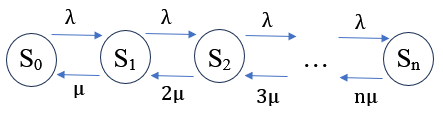

$$\text{Вероятность состояния} \space S_0 : P_0=\frac{1}{\sum_{i=0}^n{\frac{\lambda^i}{\mu^i \cdot i!}}}$$
$$\text{Вероятность состояния} \space S_i : P_i= \frac{\lambda^i}{\mu^i \cdot i!} \cdot P_0 $$
$$P_{\text{отказа}} = P_n$$


 n  |  P(n)
----|--------
 0  |  1.00000
 1  |  0.66667
 2  |  0.40000
 3  |  0.21053
 4  |  0.09524
 5  |  0.03670
 6  |  0.01208
 7  |  0.00344
 8  |  0.00086
 9  |  0.00019
10  |  0.00004
11  |  0.00001
12  |  0.00000
13  |  0.00000
14  |  0.00000


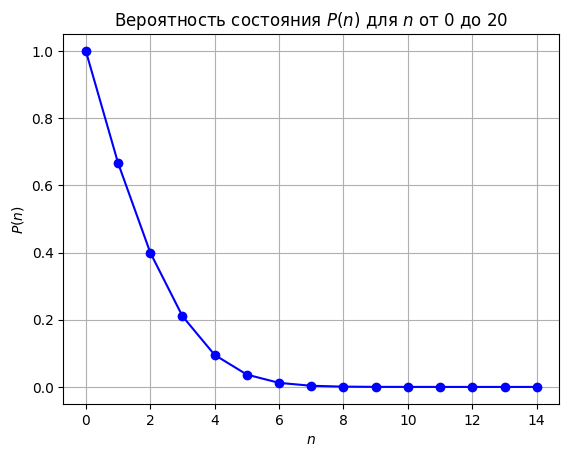

In [ ]:
# Данные
Tc = 32.0 # Среднее время между звонками клиентов в секундах
Ts = 64.0 # Среднее время обслуживания в секундах

# Скорость прибытия и скорость обслуживания
lambda_val = 1.0 / Tc
mu_val = 1.0 / Ts

# Расчет P(0), суммируя вероятности до большого числа
def calculate_P0(lambda_val, mu_val, n_max):
    P0_inv = sum((lambda_val / mu_val) ** n / factorial(n) for n in range(n_max+1))
    return 1.0 / P0_inv

# Расчет P(n) для n от 0 до 15
n_values = range(15)
P_values = [((lambda_val / mu_val) ** n / factorial(n)) * calculate_P0(lambda_val, mu_val, n) for n in n_values]

# Вывод таблицы n и P(n)
print(" n  |  P(n)")
print("----|--------")
for n, P in zip(n_values, P_values):
    print(f"{n:2d}  |  {P:.5f}")

# Примечание: Часть кода для построения графика была опущена, так как вы сначала запросили таблицу.
# Построение вероятности P(n)
plt.plot(n_values, P_values, marker='o', linestyle='-', color='b')
plt.title('Вероятность состояния $P(n)$ для $n$ от 0 до 20')
plt.xlabel('$n$')
plt.ylabel('$P(n)$')
plt.grid(True)
plt.show()

Значения до того, пока они не станут меньше 0,01: $$n=7$$

---



Математическое ожидание числа занятых операторов : $$M(n) = \sum_{i=0}^n{i \cdot P_i}$$

Коэффициент загрузки операторов : $$K_n = \frac{M(n)}{n}$$

 n  |    M(n)   |   K(n)   |  P_values
----|-----------|----------|-------------------
 0  |  0.00000  |  0.00000 |  1.00000
 1  |  0.66667  |  0.66667 |  0.33333, 0.66667
 2  |  1.20000  |  0.60000 |  0.20000, 0.40000, 0.40000
 3  |  1.57895  |  0.52632 |  0.15789, 0.31579, 0.31579, 0.21053
 4  |  1.80952  |  0.45238 |  0.14286, 0.28571, 0.28571, 0.19048, 0.09524
 5  |  1.92661  |  0.38532 |  0.13761, 0.27523, 0.27523, 0.18349, 0.09174, 0.03670
 6  |  1.97583  |  0.32931 |  0.13595, 0.27190, 0.27190, 0.18127, 0.09063, 0.03625, 0.01208
 7  |  1.99312  |  0.28473 |  0.13548, 0.27097, 0.27097, 0.18065, 0.09032, 0.03613, 0.01204, 0.00344


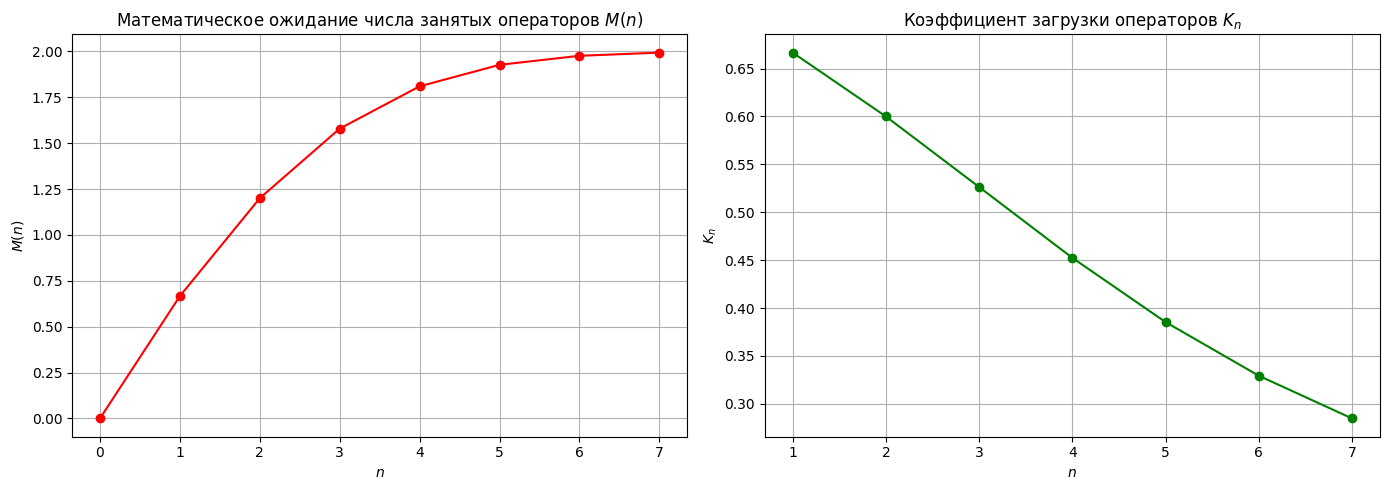

In [ ]:
n_max = 7
n_values = range(n_max + 1)
P_values_dict = {}
M_values = []
K_values = []

for n in n_values:
    P0 = calculate_P0(lambda_val, mu_val, n)
    P_values = [((lambda_val / mu_val) ** i / factorial(i)) * P0 for i in range(n+1)]
    P_values_dict[n] = P_values
    M_n = sum(i * P_values[i] for i in range(n+1))
    M_values.append(M_n)
    K_n = M_n / n if n != 0 else 0  # Избегаем деления на 0 для n=0
    K_values.append(K_n)

# Вывод таблицы n, M(n), K(n) и P_values
print(" n  |    M(n)   |   K(n)   |  P_values")
print("----|-----------|----------|-------------------")
for n, M, K in zip(n_values, M_values, K_values):
    P_values_str = ', '.join(f"{p:.5f}" for p in P_values_dict[n])
    print(f"{n:2d}  |  {M:.5f}  |  {K:.5f} |  {P_values_str}")

# Построение графиков M(n) и K_n
plt.figure(figsize=(14, 5))

# График для M(n)
plt.subplot(1, 2, 1)
plt.plot(n_values, M_values, marker='o', linestyle='-', color='r')
plt.title('Математическое ожидание числа занятых операторов $M(n)$')
plt.xlabel('$n$')
plt.ylabel('$M(n)$')
plt.grid(True)

# График для K(n)
plt.subplot(1, 2, 2)
plt.plot(n_values[1:], K_values[1:], marker='o', linestyle='-', color='g')  # Исключаем K_0
plt.title('Коэффициент загрузки операторов $K_n$')
plt.xlabel('$n$')
plt.ylabel('$K_n$')
plt.grid(True)

plt.tight_layout()
plt.show()

2. Рассмотреть систему с ограниченной очередью. Варьируя число операторов (вплоть до 15), построить семейства графиков от числа мест в очереди: вероятности отказа; математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди; коэффициента занятости мест в очереди. Варьируя число место в очереди (вплоть до 15), построить семейства графиков от числа операторов: вероятности отказа; математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди; коэффициента занятости мест в очереди.

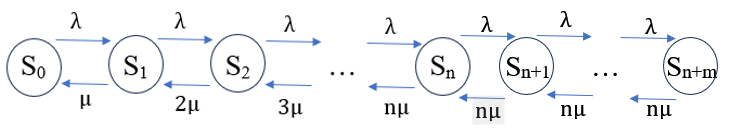

**Варьируем число операторов**

С J заявоками в очереди:
\begin{equation}
\mathrm{P}_{\text {отказа }}=\mathrm{P}_{\mathrm{n}+\mathrm{J}}=\frac{\lambda^J}{(n \mu)^J} \cdot \frac{\lambda^n}{n ! \cdot \mu^n} \cdot P_0 \\
\text{И Вероятность состояния} \space S_0 :
\mathrm{P}_0=\frac{1}{\sum_{i=0}^n \frac{\lambda^i}{\mu^i \cdot i !}+\sum_{J=1}^m \frac{\lambda^n}{\mu^n \cdot n!} \cdot \frac{\lambda^J}{\mu^J{n}^J}}
\end{equation}




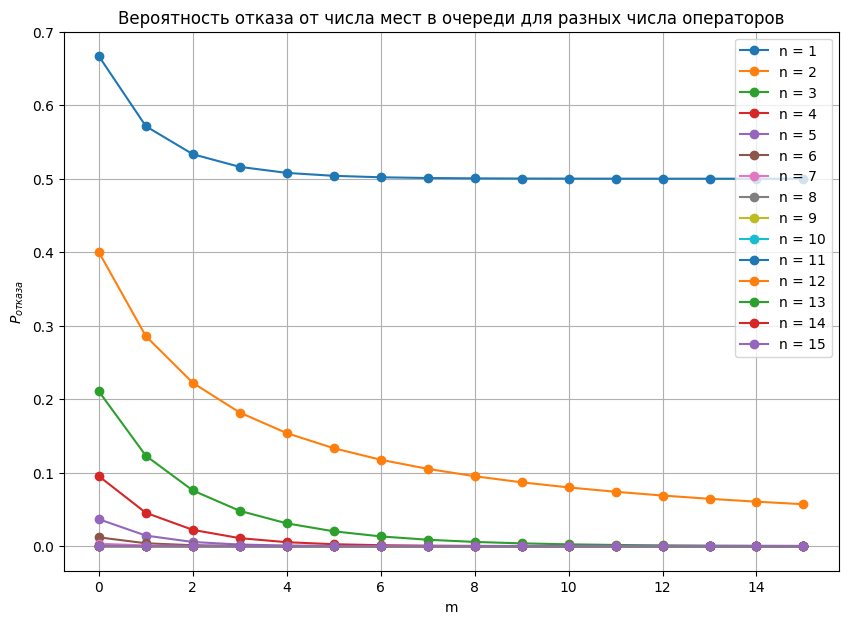

In [ ]:
# Параметры системы
Tc = 32.0 # Среднее время между звонками клиентов в секундах
Ts = 64.0 # Среднее время обслуживания в секундах

lambda_ = 1.0 / Tc  # Интенсивность входящего потока, заявок в единицу времени
mu = 1.0 / Ts       # Интенсивность обслуживания, заявок в единицу времени
N = 15       # Максимальное количество операторов
M = 15       # Максимальное количество мест в очереди


def calculate_P0(lambda_, mu, n, m):
    sum1 = sum([(lambda_**i) / (mu**i * factorial(i)) for i in range(n+1)])
    sum2 = sum([(lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j) for j in range(1, m+1)])
    return 1 / (sum1 + sum2)

def calculate_P_rejection(lambda_, mu, n, m, P0):
    return (lambda_**m) / ((n * mu)**m) * ((lambda_**n) / (mu**n * factorial(n))) * P0

# Построение графика вероятности отказа от числа мест в очереди для разных n
plt.figure(figsize=(10, 7))

for n in range(1, N+1):
    P_rejection_values = []
    for m in range(0, M+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        P_rejection = calculate_P_rejection(lambda_, mu, n, m, P0)
        P_rejection_values.append(P_rejection)

    plt.plot(range(M+1), P_rejection_values, marker='o', label=f'n = {n}')

plt.title('Вероятность отказа от числа мест в очереди для разных числа операторов')
plt.xlabel('m')
plt.ylabel('$P_{отказа}$')
plt.grid(True)
plt.legend()
plt.show()



Математическое ожидание числа занятых : $$
M(n)=\sum_{i=0}^n i \cdot P_i+n \cdot \sum_{J=1}^m P_{n+J}
$$

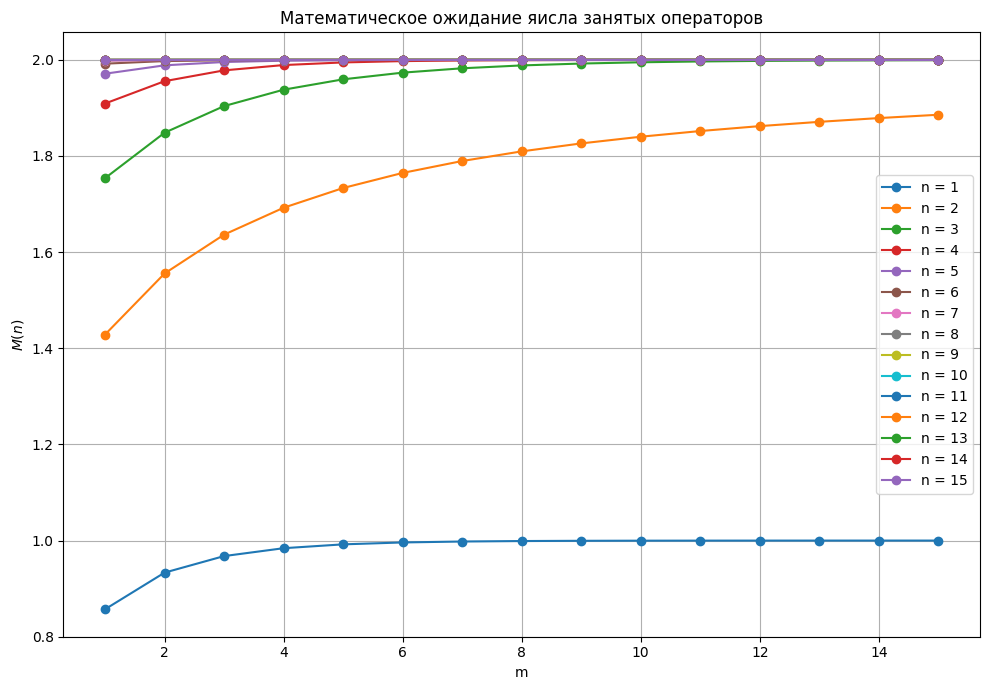

In [ ]:
plt.figure(figsize=(10, 7))

for n in range(1, N+1):
    M_values = []
    for m in range(1, M+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
        sum2 = n * sum([(P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        Mn = sum1 + sum2
        M_values.append(Mn)
    plt.plot(range(1,M+1), M_values , marker='o', label=f'n = {n}')
plt.title('Математическое ожидание яисла занятых операторов')
plt.xlabel('m')
plt.ylabel('$M(n)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Коэффициент загрузки операторов : $$K(n) = \frac{M(n)}{n}$$

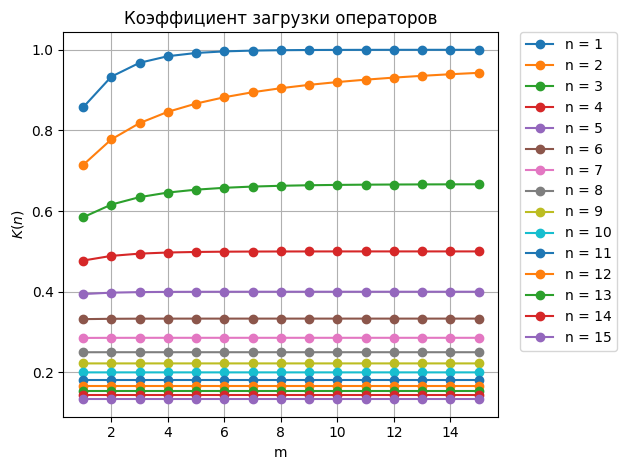

In [ ]:
for n in range(1, N+1):
    K_values = []
    for m in range(1, M+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
        sum2 = n * sum([(P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        Mn = sum1 + sum2
        Kn = Mn / n
        K_values.append(Kn)
    plt.plot(range(1,M+1), K_values , marker='o', label=f'n = {n}')
plt.title('Коэффициент загрузки операторов')
plt.xlabel('m')
plt.ylabel('$K(n)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

Вероятность существования очереди : $$P(Q) = \sum_{j=1}^m{P_{n+j}}$$

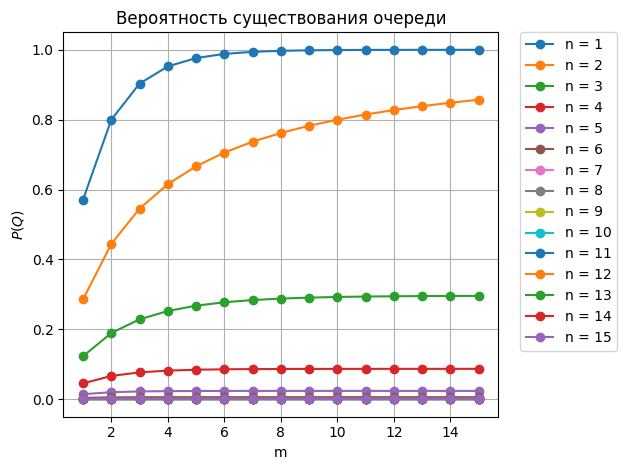

In [ ]:
for n in range(1, N+1):
    PQ_values = []
    for m in range(1, M+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        PQ = sum([(P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        PQ_values.append(PQ)
    plt.plot(range(1,M+1), PQ_values , marker='o', label=f'n = {n}')
plt.title('Вероятность существования очереди')
plt.xlabel('m')
plt.ylabel('$P(Q)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

Математическое ожидание длины очереди : $$M(Q) = \sum_{j=1}^m{j \cdot P_{n+j}}$$

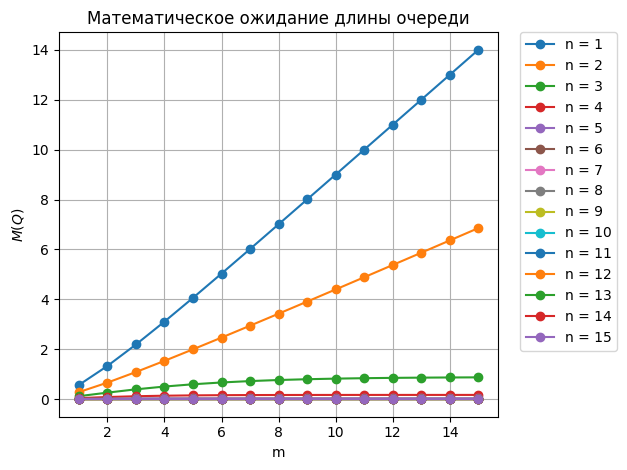

In [ ]:
for n in range(1, N+1):
    MQ_values = []
    for m in range(1, M+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        MQ = sum([ j * (P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        MQ_values.append(MQ)
    plt.plot(range(1,M+1), MQ_values , marker='o', label=f'n = {n}')
plt.title('Математическое ожидание длины очереди')
plt.xlabel('m')
plt.ylabel('$M(Q)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

Коэффициент занятости мест в очереди : $$K(m) = \frac{M(Q)}{m}$$

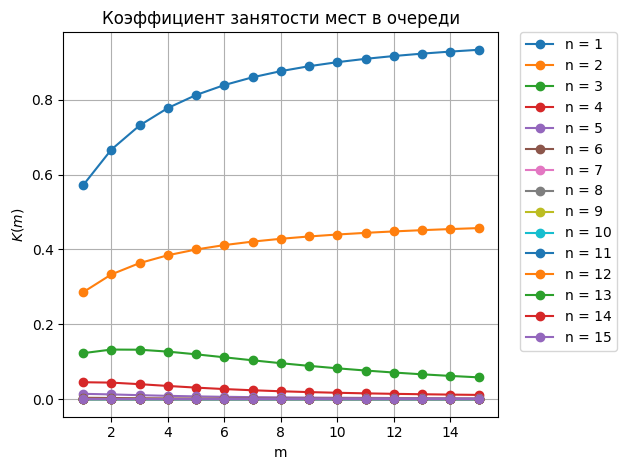

In [ ]:
for n in range(1, N+1):
    Km_values = []
    for m in range(1, M+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        MQ = sum([ j * (P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        Km = MQ / m
        Km_values.append(Km)
    plt.plot(range(1,M+1), Km_values , marker='o', label=f'n = {n}')
plt.title('Коэффициент занятости мест в очереди')
plt.xlabel('m')
plt.ylabel('$K(m)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

**Варьируем число мест в очереди**

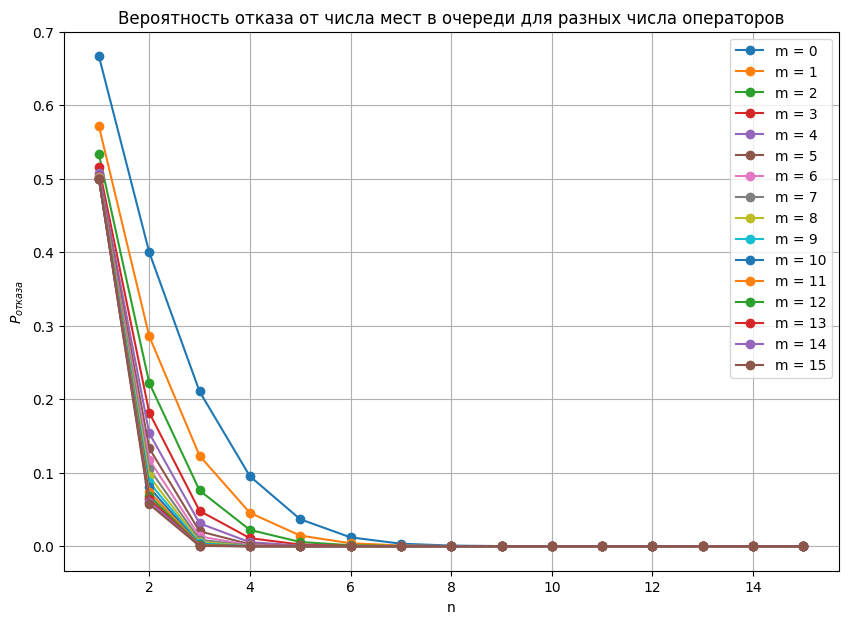

In [ ]:
# Параметры системы
Tc = 32.0 # Среднее время между звонками клиентов в секундах
Ts = 64.0 # Среднее время обслуживания в секундах

lambda_ = 1.0 / Tc  # Интенсивность входящего потока, заявок в единицу времени
mu = 1.0 / Ts       # Интенсивность обслуживания, заявок в единицу времени
N = 15       # Максимальное количество операторов
M = 15       # Максимальное количество мест в очереди


def calculate_P0(lambda_, mu, n, m):
    sum1 = sum([(lambda_**i) / (mu**i * factorial(i)) for i in range(n+1)])
    sum2 = sum([(lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j) for j in range(1, m+1)])
    return 1 / (sum1 + sum2)

def calculate_P_rejection(lambda_, mu, n, m, P0):
    return (lambda_**m) / ((n * mu)**m) * ((lambda_**n) / (mu**n * factorial(n))) * P0

# Построение графика вероятности отказа от числа мест в очереди для разных n
plt.figure(figsize=(10, 7))

for m in range(0, M+1):
    P_rejection_values = []
    for n in range(1, N+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        P_rejection = calculate_P_rejection(lambda_, mu, n, m, P0)
        P_rejection_values.append(P_rejection)

    plt.plot(range(1,N+1), P_rejection_values, marker='o', label=f'm = {m}')

plt.title('Вероятность отказа от числа мест в очереди для разных числа операторов')
plt.xlabel('n')
plt.ylabel('$P_{отказа}$')
plt.grid(True)
plt.legend()
plt.show()



Математическое ожидание числа занятых : $$
M(n)=\sum_{i=0}^n i \cdot P_i+n \cdot \sum_{J=1}^m P_{n+J}
$$

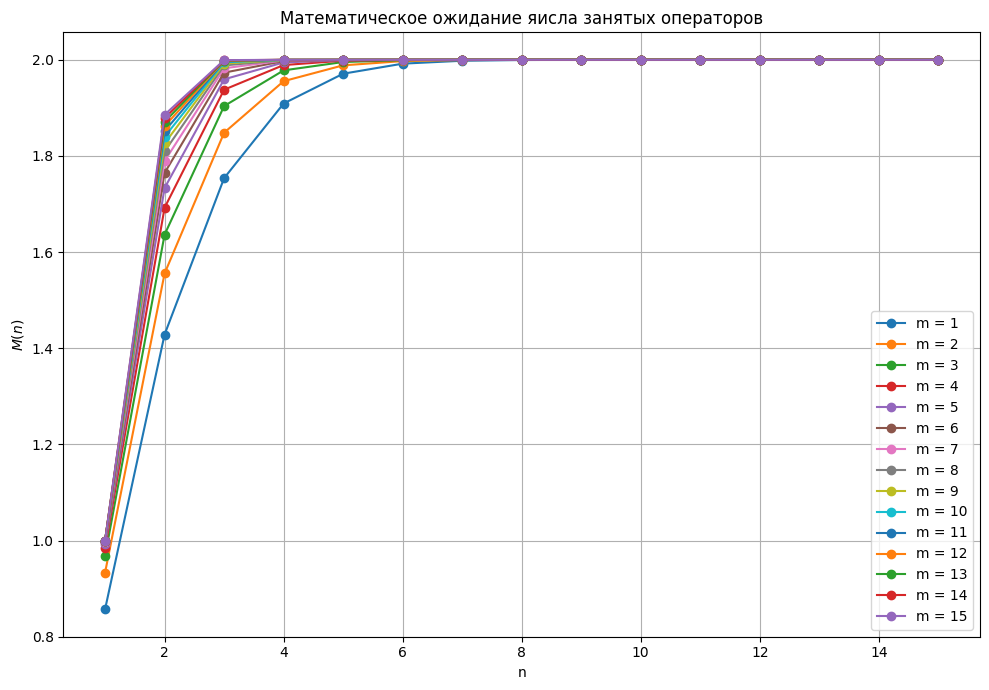

In [ ]:
plt.figure(figsize=(10, 7))

for m in range(1, M+1):
    M_values = []
    for n in range(1, N+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
        sum2 = n * sum([(P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        Mn = sum1 + sum2
        M_values.append(Mn)
    plt.plot(range(1,N+1), M_values , marker='o', label=f'm = {m}')
plt.title('Математическое ожидание яисла занятых операторов')
plt.xlabel('n')
plt.ylabel('$M(n)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Коэффициент загрузки операторов : $$K(n) = \frac{M(n)}{n}$$

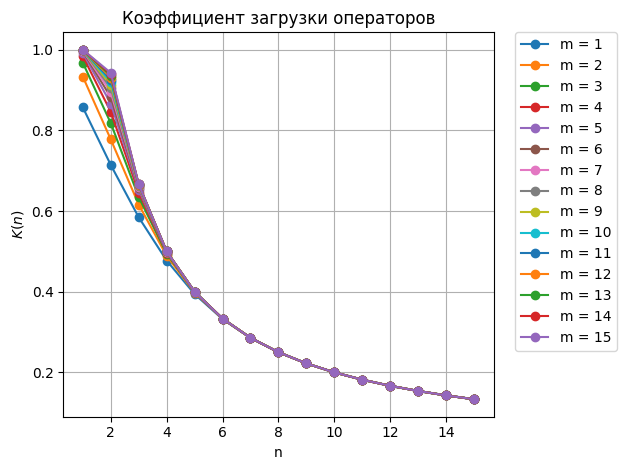

In [ ]:
for m in range(1, M+1):
    K_values = []
    for n in range(1, N+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
        sum2 = n * sum([(P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        Mn = sum1 + sum2
        Kn = Mn / n
        K_values.append(Kn)
    plt.plot(range(1,N+1), K_values , marker='o', label=f'm = {m}')
plt.title('Коэффициент загрузки операторов')
plt.xlabel('n')
plt.ylabel('$K(n)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

Вероятность существования очереди : $$P(Q) = \sum_{j=1}^m{P_{n+j}}$$

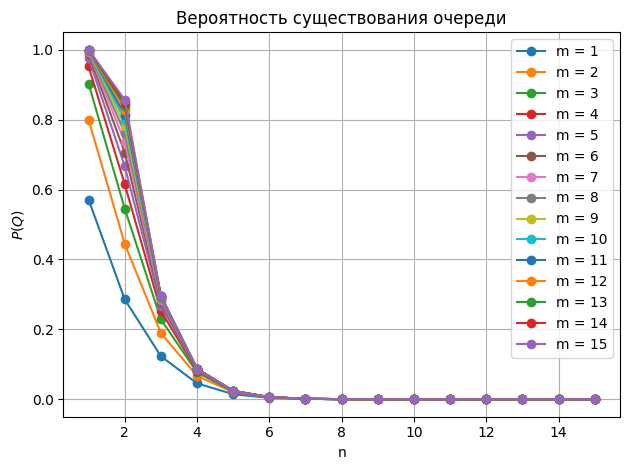

In [ ]:
for m in range(1, M+1):
    PQ_values = []
    for n in range(1, N+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        PQ = sum([(P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        PQ_values.append(PQ)
    plt.plot(range(1,N+1), PQ_values , marker='o', label=f'm = {m}')
plt.title('Вероятность существования очереди')
plt.xlabel('n')
plt.ylabel('$P(Q)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Математическое ожидание длины очереди : $$M(Q) = \sum_{j=1}^m{j \cdot P_{n+j}}$$

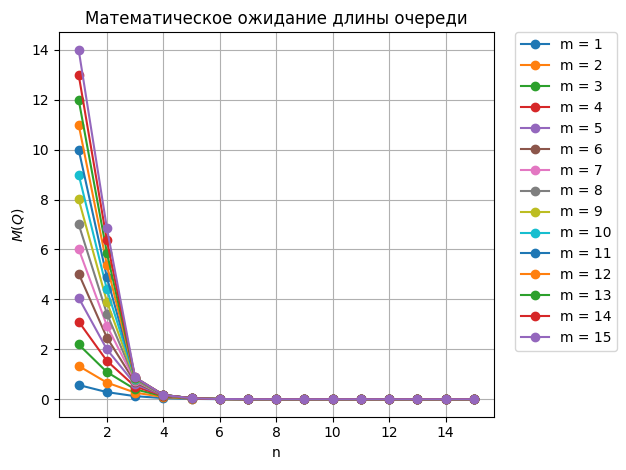

In [ ]:
for m in range(1, M+1):
    MQ_values = []
    for n in range(1, N+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        MQ = sum([ j * (P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        MQ_values.append(MQ)
    plt.plot(range(1,N+1), MQ_values , marker='o', label=f'm = {m}')
plt.title('Математическое ожидание длины очереди')
plt.xlabel('n')
plt.ylabel('$M(Q)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

Коэффициент занятости мест в очереди : $$K(m) = \frac{M(Q)}{m}$$

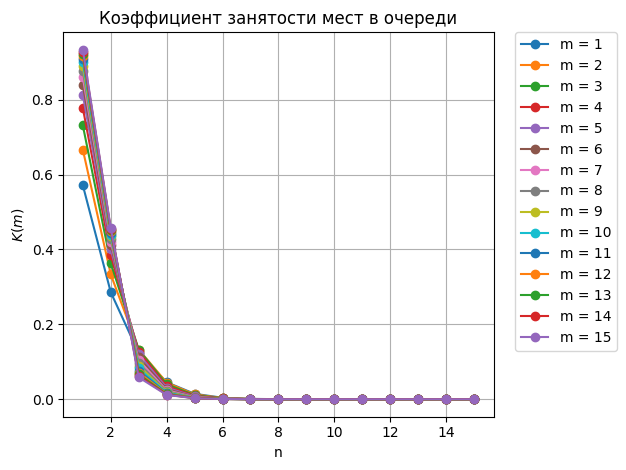

In [ ]:
for m in range(1, M+1):
    Km_values = []
    for n in range(1, N+1):
        P0 = calculate_P0(lambda_, mu, n, m)
        MQ = sum([ j * (P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_**j) / (mu**j * n**j)) for j in range(1, m+1)])
        Km = MQ / m
        Km_values.append(Km)
    plt.plot(range(1,N+1), Km_values , marker='o', label=f'm = {m}')
plt.title('Коэффициент занятости мест в очереди')
plt.xlabel('n')
plt.ylabel('$K(m)$')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

3. Рассмотреть систему без ограничений на длину очереди. Построить графики от числа операторов (вплоть до 15): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.

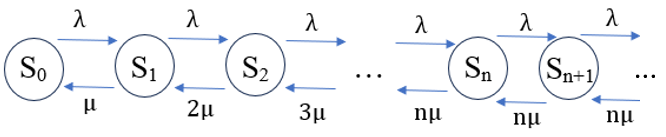

$$ \text{Вероятность состояния} \space S_0 \space : \space \mathrm{P}_0=\frac{1}{\sum_{i=0}^n \frac{\lambda^i}{\mu^{i} \cdot i!}+\frac{\lambda^n}{\mu^n \cdot n!} \sum_{J=1}^{\infty} \frac{\lambda^J}{\mu^J \cdot n^J}}
$$


$$\sum_{j=1}^{\infty}{\frac{\lambda^j}{\mu^j \cdot n^j}}=\frac{\frac{\lambda}{n\mu}}{1-\frac{\lambda}{n\mu}}$$
Поэтому
$$\mathrm{P}_0=\frac{1}{\sum_{i=0}^n \frac{\lambda^i}{\mu^{i} \cdot i!}+\frac{\lambda^n}{\mu^n \cdot n!} \frac{\frac{\lambda}{n\mu}}{1-\frac{\lambda}{n\mu}}}
$$

Математическое ожидание числа занятых операторов : $$
M(n)=\sum_{i=0}^n i \cdot P_i+n \cdot \sum_{J=1}^{\infty} P_{n+J} = \sum_{i=0}^n i \cdot P_i+n \cdot P_n\cdot \sum_{J=1}^{\infty} \frac{\lambda^J}{\mu^J \cdot n^J} = \sum_{i=0}^n i \cdot P_i+n \cdot P_n\cdot \frac{\frac{\lambda}{n\mu}}{1-\frac{\lambda}{n\mu}}
$$

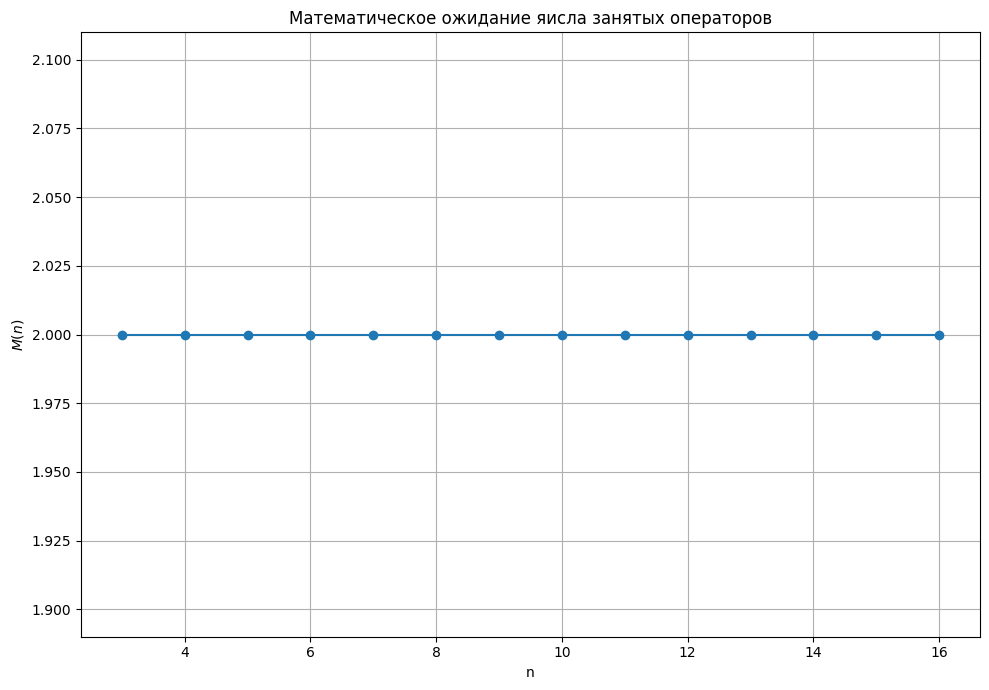

In [ ]:
# Параметры системы
Tc = 32.0 # Среднее время между звонками клиентов в секундах
Ts = 64.0 # Среднее время обслуживания в секундах

lambda_ = 1.0 / Tc  # Интенсивность входящего потока, заявок в единицу времени
mu = 1.0 / Ts       # Интенсивность обслуживания, заявок в единицу времени
N = 15       # Максимальное количество операторов

plt.figure(figsize=(10, 7))

def calculate_P0_infty(lambda_, mu, n, m):
    sum1 = sum([(lambda_**i) / (mu**i * factorial(i)) for i in range(n+1)])
    sum2 = [(lambda_**n) / (mu**n * factorial(n)) * (lambda_) / (n * mu - lambda_)]
    return 1 / (sum1 + sum2)
M_values = []
for n in range(3, N+2):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
    sum2 = n * P0 * (lambda_**n) / (mu**n * factorial(n)) * lambda_ / (n * mu - lambda_)
    Mn = sum1 + sum2
    M_values.append(Mn)
plt.plot(range(3,N+2), M_values , marker='o')
plt.title('Математическое ожидание яисла занятых операторов')
plt.xlabel('n')
plt.ylabel('$M(n)$')
plt.grid(True)
plt.tight_layout()
plt.show()

Можем увидеть : $$M(n) =
\frac{\lambda}{\mu} = \frac{\frac{1}{32}}{\frac{1}{64}} = 2 $$

 Kоэффициент загрузки операторов : $$K(n) = \frac{M(n)}{n}$$

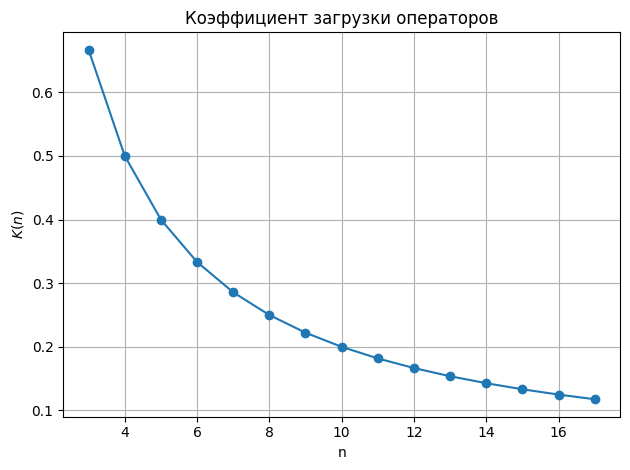

In [ ]:
K_values = []
for n in range(3, N+3):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
    sum2 = n * P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_) / (n * mu - lambda_)
    Mn = sum1 + sum2
    Kn = Mn / n
    K_values.append(Kn)
plt.plot(range(3,N+3), K_values , marker='o')
plt.title('Коэффициент загрузки операторов')
plt.xlabel('n')
plt.ylabel('$K(n)$')
plt.grid(True)
plt.tight_layout()
plt.show()

Вероятность существования очереди : $$
P(Q)=\sum_{J=1}^{\infty} P_{n+J}=P_n \sum_{J=1}^{\infty}\left(\frac{\lambda}{n \mu}\right)^J
$$

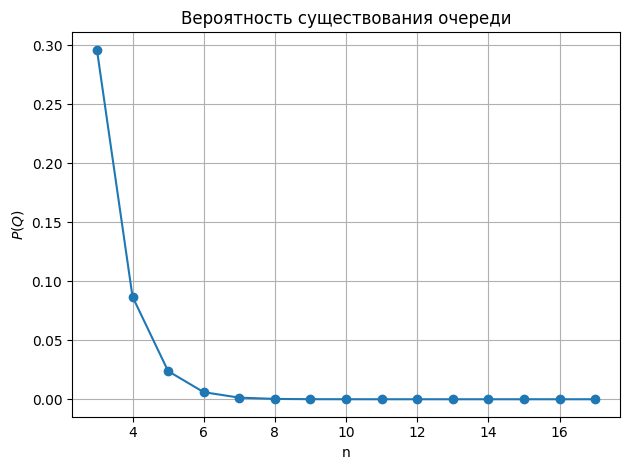

In [ ]:
PQ_values = []
for n in range(3, N+3):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    PQ = P0 * (lambda_**n) / (mu**n * factorial(n)) * (lambda_) / (n * mu - lambda_)
    PQ_values.append(PQ)
plt.plot(range(3,N+3), PQ_values , marker='o')
plt.title('Вероятность существования очереди')
plt.xlabel('n')
plt.ylabel('$P(Q)$')
plt.grid(True)
plt.tight_layout()
plt.show()

Математическое ожидание длины очереди : $$
M(Q)=\sum_{J=1}^{\infty} J \cdot P_{n+J}=P_n \sum_{J=1}^{\infty} J \cdot (\frac{\lambda}{n \mu})^J
$$


$$
\sum_{J=1}^{\infty} J \cdot a^{J} = a \cdot \sum_{J=1}^{\infty} J \cdot a^{J-1} = a \frac{d}{da}\sum_{J=1}^{\infty} a^{J} = a \frac{\frac{1}{1-a}}{da} = a \cdot \frac{1}{(1-a)^2}
$$

Поэтому:
$$
M(Q) =P_n \sum_{J=1}^{\infty} J \cdot (\frac{\lambda}{n \mu})^J = P_n \cdot \frac{\frac{\lambda}{n \mu}}{(1-\frac{\lambda}{n \mu})^2}
$$

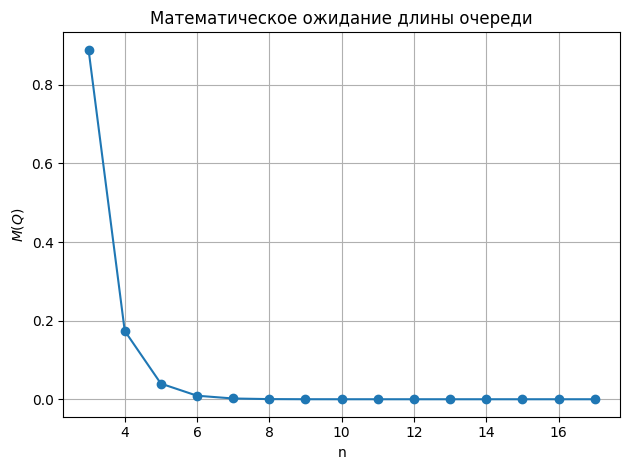

In [ ]:
MQ_values = []
for n in range(3, N+3):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    MQ = P0 * (lambda_**n) / (mu**n * factorial(n)) *((lambda_) / (n * mu))/(1-(lambda_) / (n * mu))**2
    MQ_values.append(MQ)
plt.plot(range(3,N+3), MQ_values , marker='o')
plt.title('Математическое ожидание длины очереди')

plt.xlabel('n')
plt.ylabel('$M(Q)$')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Рассмотреть систему без ограничений на длину очереди, учитывающей фактор ухода клиентов из очереди (среднее приемлемое время ожидания – Tw). Построить графики от числа операторов (вплоть до 15): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.

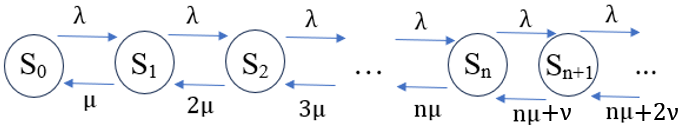

$$ \text{Вероятность состояния} \space S_0 \space : \space P_0 =
\mathrm{P}_0=\frac{1}{\sum_{i=0}^n \frac{\lambda^i}{\mu^i \cdot i !}+\frac{\lambda^n}{\mu^n \cdot n !} \sum_{J=1}^{\infty} \Pi_{l=1}^J \frac{\lambda}{n \mu+l v}}
$$
$$
\mathrm{M}(\mathrm{n})=\sum_{i=0}^n i \cdot P_i+n \sum_{J=1}^{\infty} P_{J+n}=P_0 \sum_{i=0}^n \frac{i \cdot \lambda^i}{i ! \cdot \mu^i}+n P_n \sum_{J=1}^{\infty} \prod_{l=1}^J \frac{\lambda}{n \mu+l v}
$$

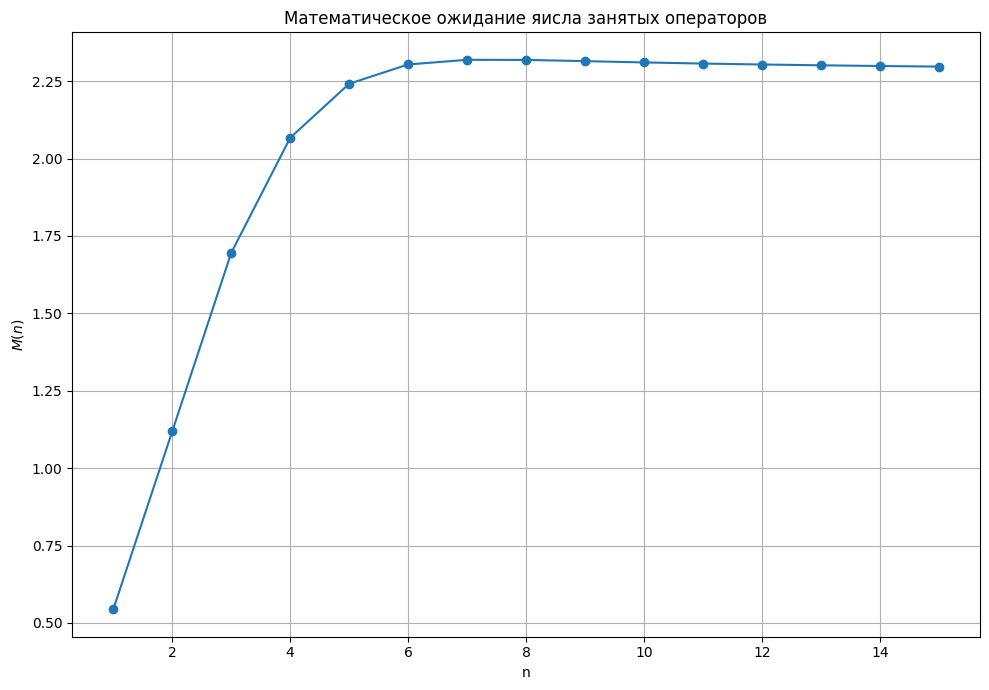

In [ ]:
# Параметры системы
Tc = 32.0 # Среднее время между звонками клиентов в секундах
Ts = 64.0 # Среднее время обслуживания в секундах
Tw = 108.0
N = 15
lambda_ = 1.0 / Tc  # Интенсивность входящего потока, заявок в единицу времени
mu = 1.0 / Ts       # Интенсивность обслуживания, заявок в единицу времени
vee = 1.0 / Tw

plt.figure(figsize=(10, 7))

def calculate_complex_series(lambda_, mu, n, v, cutoff):
    total_sum = 0.0
    for J in range(1, cutoff + 1):
        product = 1.0
        for l in range(1, J + 1):
            product *= lambda_ / (n * mu + l * v)
        total_sum += product
    return total_sum

cutoff = 1000

def calculate_P0_infty(lambda_, mu, n, m):
    sum1 = sum([(lambda_**i) / (mu**i * factorial(i)) for i in range(n+1)])
    sum2 = [(lambda_**n) / (mu**n * factorial(n)) * calculate_complex_series(lambda_, mu, n, vee, cutoff)]
    return 1 / (sum1 + sum2)
M_values = []
for n in range(1, N+1):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
    sum2 = n * P0 * calculate_complex_series(lambda_, mu, n, vee, cutoff)
    Mn = sum1 + sum2
    M_values.append(Mn)
plt.plot(range(1,N+1), M_values , marker='o')
plt.title('Математическое ожидание яисла занятых операторов')
plt.xlabel('n')
plt.ylabel('$M(n)$')
plt.grid(True)
plt.tight_layout()
plt.show()

Коэффициент загрузки операторов : $$K(n) = \frac{M(n)}{n}$$


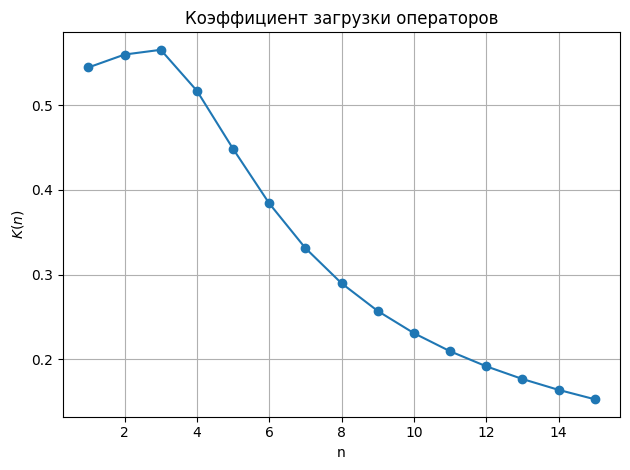

In [ ]:
K_values = []
for n in range(1, N+1):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    sum1 = sum([(i * P0 *(lambda_**i) / (mu**i * factorial(i))) for i in range(1, n+1)])
    sum2 = n * P0 * calculate_complex_series(lambda_, mu, n, vee, cutoff)
    Mn = sum1 + sum2
    Kn = Mn / n
    K_values.append(Kn)
plt.plot(range(1,N+1), K_values , marker='o')
plt.title('Коэффициент загрузки операторов')
plt.xlabel('n')
plt.ylabel('$K(n)$')
plt.grid(True)
plt.tight_layout()
plt.show()

Вероятность существования очереди : $$
P(Q)=\sum_{J=1}^{\infty} P_{n+J}=P_n \sum_{J=1}^{\infty} \prod_{l=1}^J \frac{\lambda}{n \mu+l v}
$$

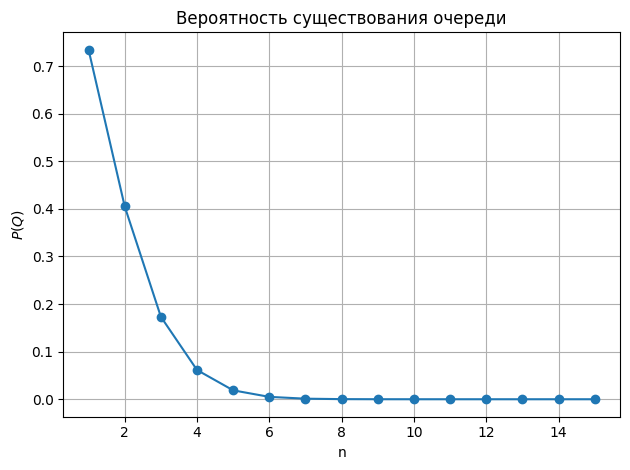

In [ ]:
PQ_values = []
for n in range(1, N+1):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    PQ = P0 *(lambda_**n) / (mu**n * factorial(n)) * calculate_complex_series(lambda_, mu, n, vee, cutoff)
    PQ_values.append(PQ)
plt.plot(range(1,N+1), PQ_values , marker='o')
plt.title('Вероятность существования очереди')
plt.xlabel('n')
plt.ylabel('$P(Q)$')
plt.grid(True)
plt.tight_layout()
plt.show()

Математическое ожидание длины очереди : $$
M(Q)=\sum_{J=1}^{\infty} J \cdot P_{n+J}=P_n \sum_{J=1}^{\infty} J \cdot \prod_{l=1}^J \frac{\lambda}{n \mu+l v}
$$

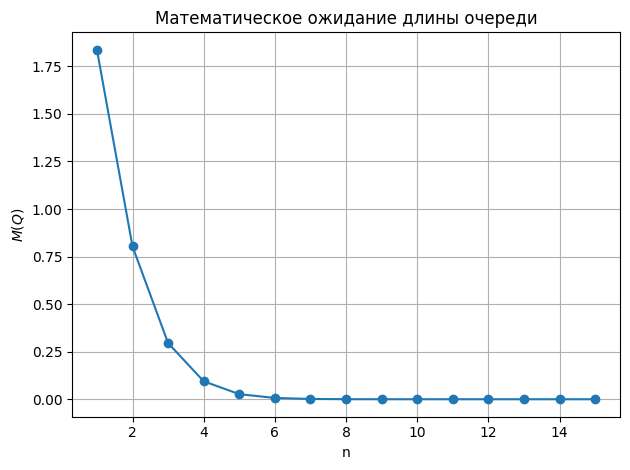

In [ ]:
MQ_values = []

def calculate_complex_series_MQ(lambda_, mu, n, v, cutoff):
    total_sum = 0.0
    for J in range(1, cutoff + 1):
        product = 1.0
        for l in range(1, J + 1):
            product *= lambda_ / (n * mu + l * v)
        total_sum += J * product
    return total_sum

for n in range(1, N+1):
    P0 = calculate_P0_infty(lambda_, mu, n, m)
    MQ = P0 *(lambda_**n) / (mu**n * factorial(n)) * calculate_complex_series_MQ(lambda_, mu, n, vee, cutoff)
    MQ_values.append(MQ)
plt.plot(range(1,N+1), MQ_values , marker='o')
plt.title('Математическое ожидание длины очереди')

plt.xlabel('n')
plt.ylabel('$M(Q)$')
plt.grid(True)
plt.tight_layout()
plt.show()


Задача №2. Проектирование производственного участка.
Имеется участок с N станками. Среднее время между наладками составляет Tc минут, среднее время наладки – Ts минут. Все потоки случайных событий считать пуассоновскими. Построить графики от числа наладчиков: математического ожидания числа простаивающих станков; математического ожидания числа станков, ожидающих обслуживания;  вероятности ожидания обслуживания; математического ожидания числа занятых наладчиков; коэффициента занятости наладчиков.

Исходные данные:
$$N = 37$$
$$Tc = 122$$
$$Ts = 49$$

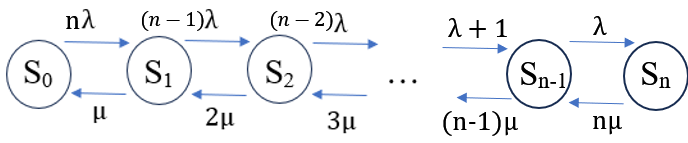

$$
P_i=\left\{\begin{array}{c}
\frac{\prod_{J=0}^{i-1}(n-J)}{i !} \cdot\left(\frac{\lambda}{\mu}\right)^i \cdot P_0 ; \space i=1, \ldots, m \\
\frac{\prod_{J=0}^{i-1}(n-J)}{m ! \cdot m^{i-m}} \cdot\left(\frac{\lambda}{\mu}\right)^i \cdot P_0; \space i=m+1, \ldots, n \\
\end{array}\right.
$$

$$\text{Вероятность состояния} \space S_0 \space :
\mathrm{P}_0=\frac{1}{1+\sum_{i=1}^m\left(\frac{\prod_{J=0}^{i-1}(n-J)}{i !} \cdot\left(\frac{\lambda}{\mu}\right)^i\right)+\sum_{i=m+1}^n\left(\frac{\prod_{J=0}^{i-1}(n-J)}{m ! \cdot m^{i-m}} \cdot\left(\frac{\lambda}{\mu}\right)^i\right)}
$$

Математическое ожидание числа простаивающих станков: $$
\mathrm{M}=\sum_{i=0}^n i \cdot P_i
$$

In [ ]:
from math import factorial, prod

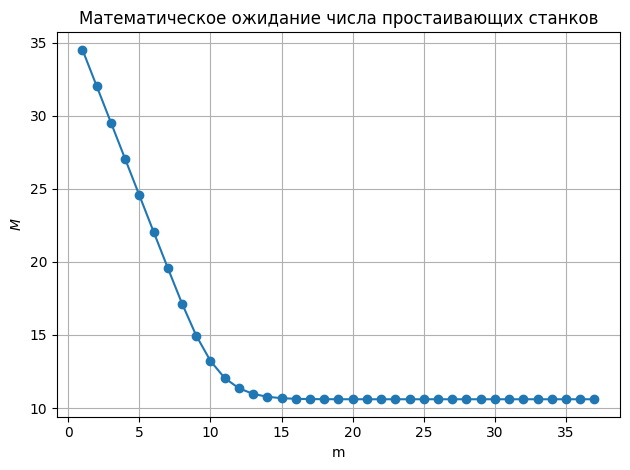

In [ ]:
N = 37
Tc = 122.00
Ts = 49.00

lambda_ = 1.00 / Tc
mu = 1.00 / Ts

def calculate_P0_t2(n, m, lambda_, mu):
    # First sum for i from 1 to m
    first_sum = sum((prod(n - j for j in range(i)) / factorial(i)) * ((lambda_ / mu) ** i) for i in range(1, m + 1))

    # Second sum for i from m+1 to n
    second_sum = sum((prod(n - j for j in range(i)) / (factorial(m) * (m ** (i - m)))) * ((lambda_ / mu) ** i) for i in range(m + 1, n + 1))

    # Calculate P0
    P0 = 1 / (1 + first_sum + second_sum)

    return P0

M_values = []
for m in range(1, N+1):
    P0 = calculate_P0_t2(n, m, lambda_, mu)
    M = 0
    for i in range(n + 1):
        if i <= m:
            Pi = P0 * (prod(n - j for j in range(i)) / factorial(i)) * ((lambda_ / mu) ** i)
        else:
            Pi = P0 * (prod(n - j for j in range(i)) / (factorial(m) * (m ** (i - m)))) * ((lambda_ / mu) ** i)
        M += i * Pi
    M_values.append(M)


plt.plot(range(1,N+1), M_values , marker='o')
plt.title('Математическое ожидание числа простаивающих станков')
plt.xlabel('m')
plt.ylabel('$M$')
plt.grid(True)
plt.tight_layout()
plt.show()

Математического ожидания числа станков, ожидающих обслуживания : $$
\mathrm{M}=\sum_{i=1}^{n-m} i \cdot P_{m+i}
$$

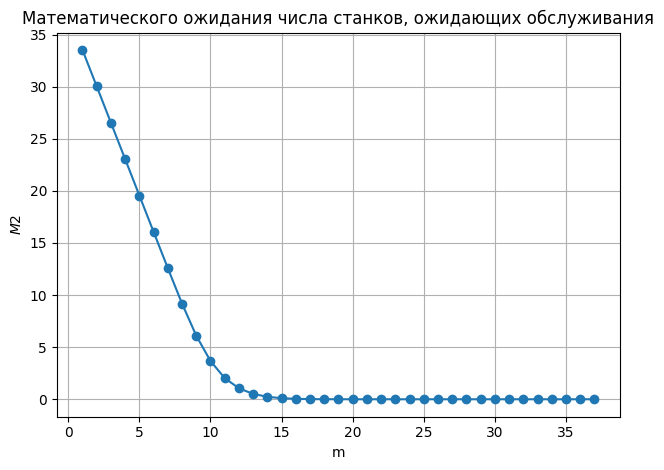

In [ ]:
M2_values = []
for m in range(1, N+1):
    P0 = calculate_P0_t2(n, m, lambda_, mu)
    M2 = 0

    for i in range(n + 1-m):
        Pi = P0 * (prod(n - j for j in range(i+m)) / (factorial(m) * (m ** (i)))) * ((lambda_ / mu) ** (i+m))
        M2 += i * Pi
    M2_values.append(M2)


plt.plot(range(1,N+1), M2_values , marker='o')
plt.title('Математического ожидания числа станков, ожидающих обслуживания')
plt.xlabel('m')
plt.ylabel('$M2$')
plt.grid(True)
plt.tight_layout()
plt.show()

Вероятность ожидания обслуживания : $$
\mathrm{P}=\sum_{i=0}^n P_0
$$

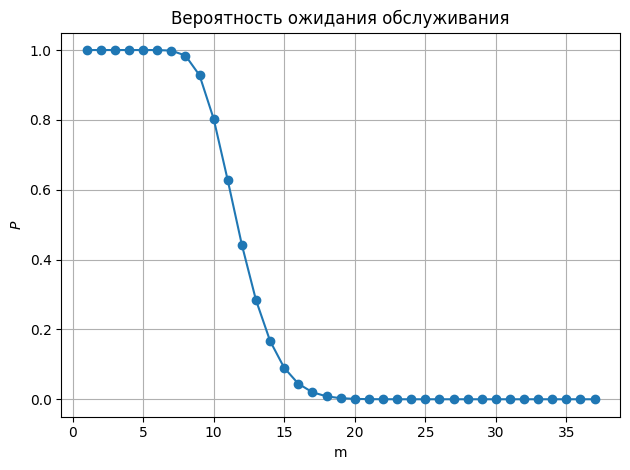

In [ ]:
P_values = []
for m in range(1, N+1):
    P0 = calculate_P0_t2(n, m, lambda_, mu)
    P = 0
    for i in range(n + 1-m):
        Pi = P0 * (prod(n - j for j in range(i+m)) / (factorial(m) * (m ** (i)))) * (lambda_ / mu) ** (i+m)
        P += Pi
    P_values.append(P)


plt.plot(range(1,N+1), P_values , marker='o')
plt.title('Вероятность ожидания обслуживания')
plt.xlabel('m')
plt.ylabel('$P$')
plt.grid(True)
plt.tight_layout()
plt.show()

Математическое ожидание числа занятых наладчиков: $$
\mathrm{M}=\sum_{i=0}^m i \cdot P_i+m \cdot \sum_{i=m+1}^n P_i
$$

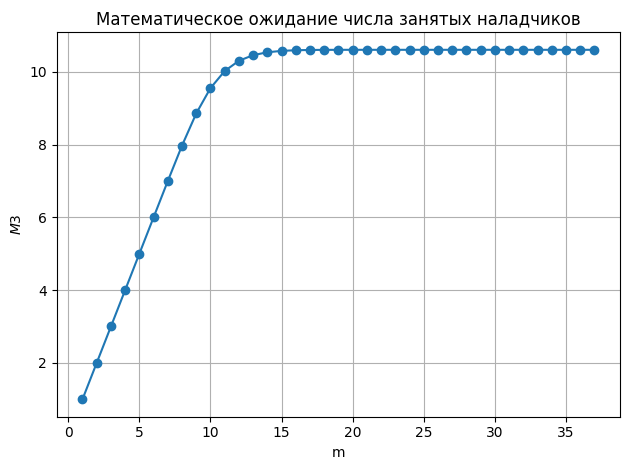

In [ ]:
M3_values = []
for m in range(1, N+1):
    P0 = calculate_P0_t2(n, m, lambda_, mu)
    M3 = 0
    for i in range(n + 1):
      if i <= m:
          M3 += i * P0 * (prod(n - j for j in range(i)) / factorial(i)) * ((lambda_ / mu) ** i)
      else:
          M3 += m * P0 * (prod(n - j for j in range(i)) / (factorial(m) * (m ** (i - m)))) * ((lambda_ / mu) ** i)
    M3_values.append(M3)


plt.plot(range(1,N+1), M3_values , marker='o')
plt.title('Математическое ожидание числа занятых наладчиков')
plt.xlabel('m')
plt.ylabel('$M3$')
plt.grid(True)
plt.tight_layout()
plt.show()

Коэффициента занятости наладчиков : $$
\mathrm{K}=\frac{M \text { (занятых наладчиков })}{m}
$$

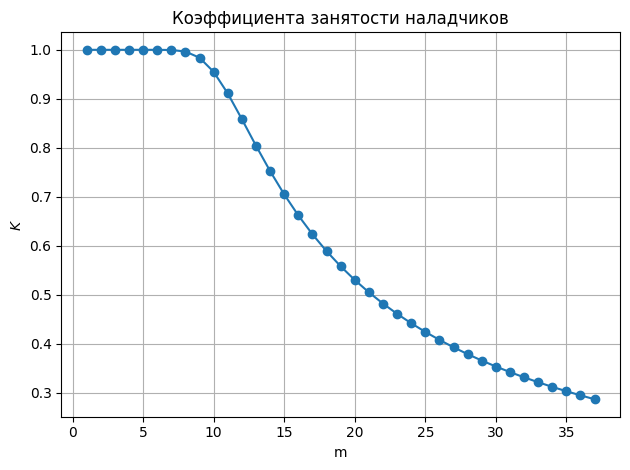

In [ ]:
K_values = []
for m in range(1, N+1):
    P0 = calculate_P0_t2(n, m, lambda_, mu)
    M3 = 0
    for i in range(n + 1):
      if i <= m:
          M3 += i * P0 * (prod(n - j for j in range(i)) / factorial(i)) * ((lambda_ / mu) ** i)
      else:
          M3 += m * P0 * (prod(n - j for j in range(i)) / (factorial(m) * (m ** (i - m)))) * ((lambda_ / mu) ** i)
    K = M3 / m
    K_values.append(K)


plt.plot(range(1,N+1), K_values , marker='o')
plt.title('Коэффициента занятости наладчиков')
plt.xlabel('m')
plt.ylabel('$K$')
plt.grid(True)
plt.tight_layout()
plt.show()